**ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown ke

LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA Root Mean Squared Error (RMSE) with (30, 1, 1): 0.12338115170456115
LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA Mean Absolute Percentage Error (MAPE) with (30, 1, 1): 16.533251740634956


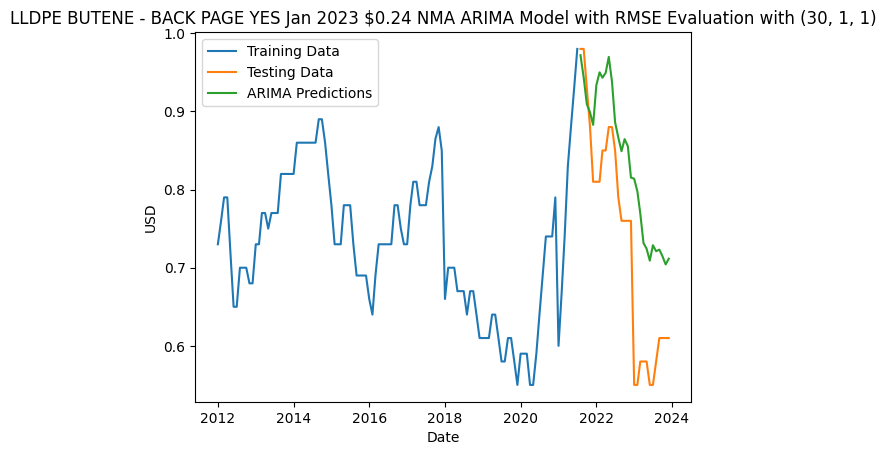

In [7]:
# ARIMA - with 30 months lag; LLDPE RMSE = 0.123; MAPE = 16.53%

# Importing necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


# Input data
df = pd.read_excel('12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')
df['Time'] = pd.to_datetime(df['Month'])
df = df.set_index('Time')


# Selecting the required Resins
resinlst = [
    # 'HDPE MED QUAL - BACK PAGE YES Jan 2023 $0.20 NMA',
    # 'HDPE HMW FILM', 'HDPE HIC MLDG',
    # 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA',
    # 'LLDPE HEXENE - BACK PAGE YES Jan 2023 $0.23 NMA',
    # 'Nylon 6', 'Nylon 66', 'PET RESIN',
    # 'POLYPROPYLENE - BACK PAGE YES', 'POLYSTYRENE GPPS',
    # 'PS HIPS', 'PVC (GP)', 'Ethylene Glycol (EG)', 'Unsaturated Polyester', 'PPI Commodities',
    # 'Nylon (CMAI)', 'Crude Oil', 'Crude Oil 2'
]


# Defining ARIMA Parameters
# arimalist = [(6,1,1), (12,1,1), (24,1,1), (30,1,1)] - best perform (30,1,1)
arimalist = [(30,1,1)]


# Iterating the model over selected Resin List
for i in resinlst:
  series = df[i]

  series = series.dropna()
  # Split the data into training and testing sets
  train_size = int(len(series) * 0.8)
  train, test = series[:train_size], series[train_size:]

  for j in arimalist:
    # Fit the ARIMA model
    model = ARIMA(train, order=j)  # You may need to tune the order parameters
    fit_model = model.fit()

    # Make predictions on the test set
    predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    print(f'{i} Root Mean Squared Error (RMSE) with {j}: {rmse}')
    print(f'{i} Mean Absolute Percentage Error (MAPE) with {j}: {mape}')

    # Plotting
    plt.plot(train, label='Training Data')
    plt.plot(test, label='Testing Data')
    plt.plot(predictions, label='ARIMA Predictions')
    plt.title(f'{i} ARIMA Model with RMSE Evaluation with {j}')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()
    plt.show()

**VMD-ARIMA**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE on Test Data: 0.06187234945442824
MAPE on Test Data: 7.767650628241249


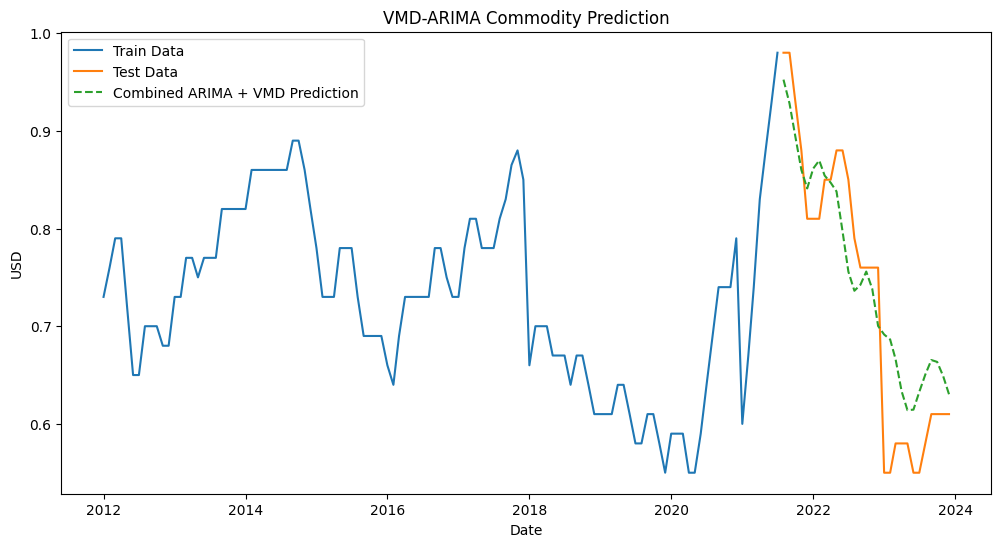

In [9]:
# VMD-ARIMA - with 30 months lag; LLDPE RMSE = 0.062; MAPE = 7.77%

# Installing VMD package and importing libraries
!pip install vmdpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# Input data
df = pd.read_excel('12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')
df['Time'] = pd.to_datetime(df['Month'])
df = df.set_index('Time')


# Selecting the required Resins
resinlst = [
    # 'HDPE MED QUAL - BACK PAGE YES Jan 2023 $0.20 NMA',
    # 'HDPE HMW FILM', 'HDPE HIC MLDG',
    # 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA',
    # 'LLDPE HEXENE - BACK PAGE YES Jan 2023 $0.23 NMA',
    # 'Nylon 6', 'Nylon 66', 'PET RESIN',
    # 'POLYPROPYLENE - BACK PAGE YES', 'POLYSTYRENE GPPS',
    # 'PS HIPS', 'PVC (GP)', 'Ethylene Glycol (EG)', 'Unsaturated Polyester', 'PPI Commodities',
    # 'Nylon (CMAI)', 'Crude Oil', 'Crude Oil 2'
]


# Defining VMD Parameters
alpha = 500  # Mode mixing parameter
tau = 0.1    # Stopping criterion
K = 2
DC = 0
init = 1
tol = 1e-7


# Defining ARIMA Parameters
# arima_order = [(6,1,1), (12,1,1), (18,1,1), (24,1,1), (30,1,1)]
arima_order = [(30,1,1)]


# Iterating the model over selected Resin List
for r in resinlst:
    signal = df[r].dropna().values

    train_size = int(len(signal) * 0.8)
    train, test = signal[:train_size], signal[train_size:]

    # Perform VMD decomposition
    modes, trend, vmd = VMD(signal, alpha=alpha, tau=tau, K=K, DC=DC, init=init, tol=tol)

    # Initialize an array to store ARIMA predictions for each mode
    arima_predictions = np.zeros((modes.shape[0], len(signal)))

    # Fit ARIMA and make predictions for each mode
    for j in arima_order:
      for i in range(modes.shape[0]):
        model = ARIMA(modes[i, :train_size+1], order=j)
        fit_model = model.fit()
        arima_predictions[i, train_size:] = fit_model.predict(start=train_size, end=len(signal) - 1, typ='levels')

      # Reconstruct the final prediction by summing up predictions from all modes
      final_prediction = np.sum(arima_predictions, axis=0)

      # Calculate RMSE for the final prediction on the test data
      rmse = sqrt(mean_squared_error(test, final_prediction[train_size:]))
      mape = np.mean(np.abs((test - final_prediction[train_size:]) / test)) * 100
      print(f'RMSE on Test Data: {rmse}')
      print(f'MAPE on Test Data: {mape}')

      # Plotting
      plt.figure(figsize=(12, 6))
      plt.plot(df.index[:train_size], train, label='Train Data')
      plt.plot(df.index[train_size:len(signal)], test, label='Test Data')
      plt.plot(df.index[train_size:len(signal)], final_prediction[train_size:], label='Combined ARIMA + VMD Prediction', linestyle='--')
      plt.title('VMD-ARIMA Commodity Prediction')
      plt.xlabel('Date')
      plt.ylabel('USD')
      plt.legend()
      plt.show()


**LSTM (w/ normalization)**

Epoch 1/1000
4/4 [==============================] - 3s 173ms/step - loss: 0.4643 - val_loss: 0.5321
Epoch 2/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4546 - val_loss: 0.5224
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4451 - val_loss: 0.5129
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4356 - val_loss: 0.5034
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4263 - val_loss: 0.4940
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4171 - val_loss: 0.4847
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4081 - val_loss: 0.4755
Epoch 8/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3992 - val_loss: 0.4664
Epoch 9/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3904 - val_loss: 0.4573
Epoch 10/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3817 - val_loss: 0.4483
Epoch 11

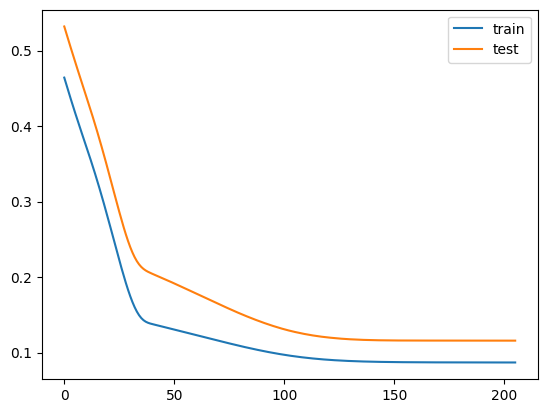

1/1 [==============================] - 0s 295ms/step
Test RMSE:0.04980139111652556
Test MAPE:4.557665522021192


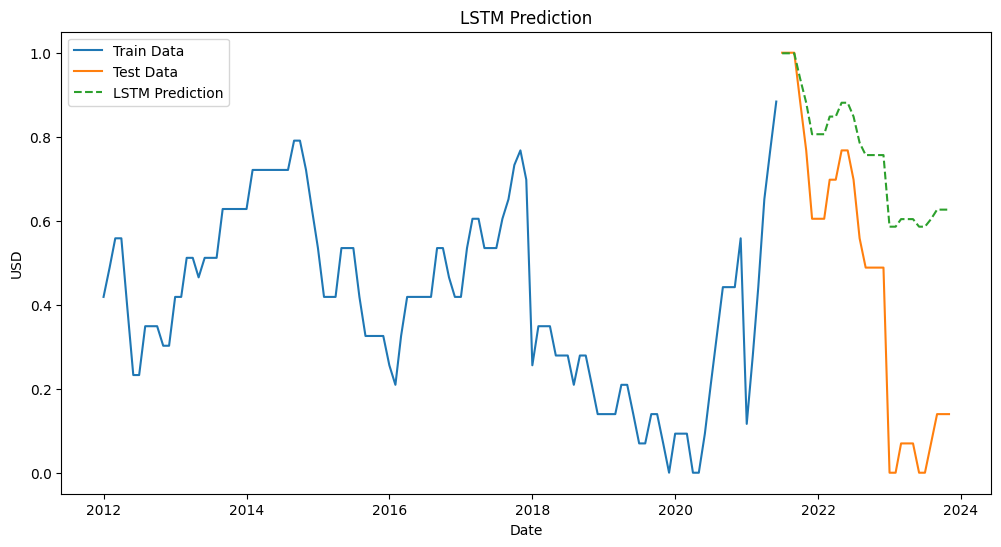

In [10]:
# LSTM with normalization, 1 month lookback; LLDPE RMSE = 0.049; MAPE = 4.53%

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K


# Input data
df = pd.read_excel('12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')
df['Time'] = pd.to_datetime(df['Month'])
df.set_index('Time', inplace=True)


# Converting Time Series to Supervised Learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


# Defining Early Stop to prevent Overfitting
early_stop = [EarlyStopping(patience=2, monitor = 'val_loss')]


# Selecting the required Resins
resinlst = [
    # 'HDPE MED QUAL - BACK PAGE YES Jan 2023 $0.20 NMA',
    # 'HDPE HMW FILM', 'HDPE HIC MLDG',
    # 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA',
    # 'LLDPE HEXENE - BACK PAGE YES Jan 2023 $0.23 NMA',
    # 'Nylon 6', 'Nylon 66', 'PET RESIN',
    # 'POLYPROPYLENE - BACK PAGE YES', 'POLYSTYRENE GPPS',
    # 'PS HIPS', 'PVC (GP)', 'Ethylene Glycol (EG)', 'Unsaturated Polyester', 'PPI Commodities',
    # 'Nylon (CMAI)', 'Crude Oil', 'Crude Oil 2'
]


# Iterating the model over selected Resin List
for i in resinlst:
    # Select the data for the current commodity
    data = df[[i]].dropna()
    values = data.values

    # Normalize data and features (only 1 now)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled = scaler.fit_transform(values)

    reframed = series_to_supervised(scaled, 1, 1)
    values = reframed.values

    # Split train and test
    trainsize= int(len(values)*0.8)
    train = values[:trainsize, :]
    test = values[trainsize:, :]

    # Split input and output
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation = 'relu',input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(units=1))

    # # Compile model
    model.compile(optimizer='adam', loss=root_mean_squared_error)

    # Train model
    history = model.fit(train_X, train_y, epochs=1000, batch_size=32,
                        validation_data=(test_X, test_y), verbose=1,
                        shuffle=False, callbacks = early_stop)

    # plot learing curve
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    # Prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]

    # print(inv_y)
    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE:' +str(rmse))
    mape = np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100
    print('Test MAPE:' + str(mape))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:trainsize], train[:,0], label='Train Data')
    plt.plot(df.index[trainsize:len(values)], test[:,0], label='Test Data')
    plt.plot(df.index[trainsize:len(values)], inv_yhat[:], label='LSTM Prediction', linestyle='--')
    plt.title(f'LSTM Prediction')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()
    plt.show()


**GRU**

Epoch 1/100
113/113 - 7s - loss: 0.0550 - 7s/epoch - 64ms/step
Epoch 2/100
113/113 - 1s - loss: 0.0330 - 663ms/epoch - 6ms/step
Epoch 3/100
113/113 - 1s - loss: 0.0313 - 646ms/epoch - 6ms/step
Epoch 4/100
113/113 - 1s - loss: 0.0278 - 624ms/epoch - 6ms/step
Epoch 5/100
113/113 - 1s - loss: 0.0281 - 627ms/epoch - 6ms/step
Epoch 6/100
113/113 - 1s - loss: 0.0268 - 634ms/epoch - 6ms/step
Epoch 7/100
113/113 - 1s - loss: 0.0277 - 617ms/epoch - 5ms/step
Epoch 8/100
113/113 - 1s - loss: 0.0230 - 685ms/epoch - 6ms/step
Epoch 9/100
113/113 - 1s - loss: 0.0273 - 897ms/epoch - 8ms/step
Epoch 10/100
113/113 - 1s - loss: 0.0221 - 900ms/epoch - 8ms/step
Epoch 11/100
113/113 - 1s - loss: 0.0219 - 761ms/epoch - 7ms/step
Epoch 12/100
113/113 - 1s - loss: 0.0193 - 647ms/epoch - 6ms/step
Epoch 13/100
113/113 - 1s - loss: 0.0178 - 627ms/epoch - 6ms/step
Epoch 14/100
113/113 - 1s - loss: 0.0161 - 610ms/epoch - 5ms/step
Epoch 15/100
113/113 - 1s - loss: 0.0142 - 620ms/epoch - 5ms/step
Epoch 16/100
113/113 

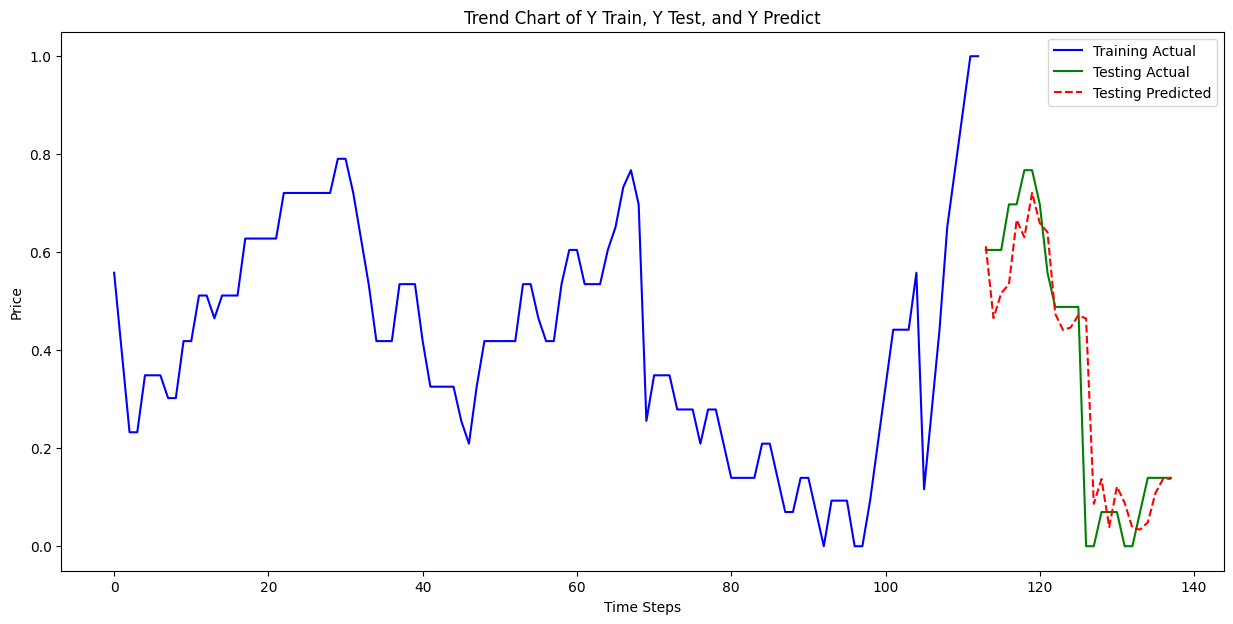

In [12]:
# GRU; LLDPE RMSE = 0.050; MAPE: 4.80%

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.callbacks import EarlyStopping
from math import sqrt
import matplotlib.pyplot as plt


# Input data
df = pd.read_excel('12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')


# Selecting the required Resins
resinlst = [
    # 'HDPE MED QUAL - BACK PAGE YES Jan 2023 $0.20 NMA',
    # 'HDPE HMW FILM', 'HDPE HIC MLDG',
    # 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA',
    # 'LLDPE HEXENE - BACK PAGE YES Jan 2023 $0.23 NMA',
    # 'Nylon 6', 'Nylon 66', 'PET RESIN',
    # 'POLYPROPYLENE - BACK PAGE YES', 'POLYSTYRENE GPPS',
    # 'PS HIPS', 'PVC (GP)', 'Ethylene Glycol (EG)', 'Unsaturated Polyester', 'PPI Commodities',
    # 'Nylon (CMAI)', 'Crude Oil', 'Crude Oil 2'
]

#Preprocessing
month_column = df['Month']
resin_data = df[resinlst[0]]
data = pd.DataFrame({'Month': month_column, 'Resin1': resin_data})

data['Month'] = pd.to_datetime(data['Month'])
data.sort_values('Month', inplace=True)

data['rolling_avg_price'] = data['Resin1'].rolling(window=3, min_periods=1).mean()

# Forward fill the NaN values created by rolling average calculation
data['rolling_avg_price'].fillna(method='ffill', inplace=True)

# Ensure there are no NaNs before scaling
data.fillna(method='ffill', inplace=True)
data.dropna(inplace=True)  # Drop any remaining NaNs as a precaution

# Calculate the unique number of months to determine the split point
unique_months = data['Month'].dt.to_period('M').unique()
n_months = len(unique_months)
train_months = int(n_months * 0.8)  # 80% for training

# Get the last month of the training set
last_train_month = unique_months[train_months - 1]

# Split the data based on the last month in the training set
train_data = data[data['Month'] <= last_train_month.to_timestamp()]
test_data = data[data['Month'] > last_train_month.to_timestamp()]

# Select the columns to scale
values_to_scale = data[['Resin1', 'rolling_avg_price']].values

# Scale the values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values_to_scale)

# Replace the original columns with the scaled values
data[['Resin1', 'rolling_avg_price']] = scaled_values

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 1])  # Use rolling_avg_price for input
        Y.append(data[i + look_back, 0])  # Predict price
    return np.array(X), np.array(Y)

# Convert the DataFrame to a numpy array
data_array = data[['Resin1', 'rolling_avg_price']].values

# Define the look_back period
look_back = 3  # Number of previous months to consider for each prediction

# Create the dataset
X, Y = create_dataset(data_array, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

data.sort_values('Month', inplace=True)

# Determine the split point for an approximate 80%-20% division based on unique months
unique_months = data['Month'].dt.to_period('M').unique()
split_index = int(len(unique_months) * 0.8)

# Find the month that corresponds to the split point
split_month = unique_months[split_index]

# Split the data based on this month
train_data = data[data['Month'].dt.to_period('M') <= split_month]
test_data = data[data['Month'].dt.to_period('M') > split_month]

# Now, apply the create_dataset function to both the train and test sets separately
# Convert train_data and test_data to numpy arrays as needed, excluding the 'month' column for modeling
train_array = train_data[['Resin1', 'rolling_avg_price']].values
test_array = test_data[['Resin1', 'rolling_avg_price']].values

# Create datasets for training and testing
X_train, Y_train = create_dataset(train_array, look_back)
X_test, Y_test = create_dataset(test_array, look_back)

# Reshape input to be [samples, time steps, features] for both train and test sets
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the GRU model
model = Sequential()

model.add(GRU(4, input_shape=(look_back, 1), return_sequences=True))  # Make sure to return sequences
model.add(GRU(50, return_sequences=True))  # Second layer with 50 neurons, keep return_sequences=True
model.add(GRU(50, return_sequences=True))  # Third layer with 50 neurons, keep return_sequences=True
model.add(GRU(30))  # Third layer with 30 neurons, does not return sequences to connect to the Dense output layer
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, callbacks=[EarlyStopping(monitor='loss', patience=10)])

from sklearn.metrics import mean_squared_error

# Make predictions
predictions = model.predict(X_test)

# Invert scaling for predictions to evaluate performance
predictions_inv = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), 1))), axis=1))[:,0]

# Invert scaling for actual Y_test to evaluate performance
Y_test_inv = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1,1), np.zeros((len(Y_test), 1))), axis=1))[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print('RMSE: %.3f' % rmse)
mape = np.mean(np.abs((Y_test_inv - predictions_inv) / Y_test_inv)) * 100
print('MAPE: %.3f' % mape)

Y_actual = np.concatenate((Y_train, Y_test), axis=0)

time_steps = np.arange(Y_actual.shape[0])

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(time_steps[:len(Y_train)], Y_train, label='Training Actual', color='blue')
plt.plot(time_steps[len(Y_train):], Y_test, label='Testing Actual', color='green')
plt.plot(time_steps[len(Y_train):len(Y_train) + len(predictions)], predictions, label='Testing Predicted', color='red', linestyle='--')

plt.title('Trend Chart of Y Train, Y Test, and Y Predict')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


**Transformer**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 1)]              0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 10, 1)                2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 10, 1)                7169      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

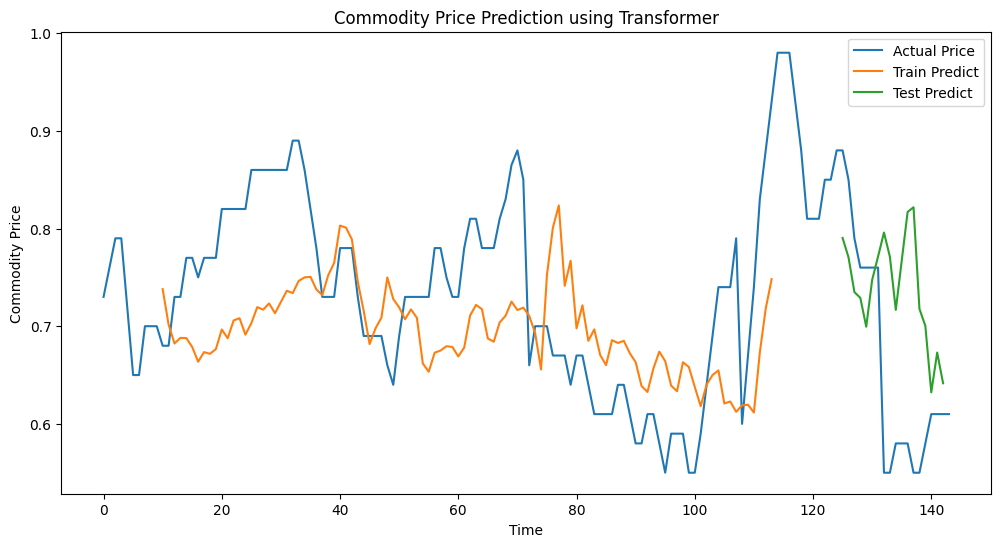

In [13]:
# Transformer, lookback = 10; RMSE = 0.14; MAPE = 4.80%

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_excel('12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')
df['Time'] = pd.to_datetime(df['Month'])
df.set_index('Time', inplace=True)

df = df[['LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA']].dropna()
data = df[['LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Parameters
time_step = 10
early_stop = [EarlyStopping(patience=2, monitor = 'val_loss')]


# split data
training_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[0:training_size,:], data_scaled[training_size:len(data_scaled),:]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# Reshape input for the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-7)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-7)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,
          batch_size=64, verbose=1, shuffle=False, callbacks = early_stop)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

inv_y_test = scaler.inverse_transform(test_data)


# Evaluate the model (Optional: Calculate RMSE or other metrics)
rmse = math.sqrt(mean_squared_error(inv_y_test[time_step+1:,:], test_predict))
mpae = np.mean(np.abs((inv_y_test[time_step + 1:] - test_predict) / inv_y_test[time_step + 1:])) * 100

# print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAPE: {mape}")

# Plotting the results
# Adjust the time_step offset for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(data_scaled)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Price')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Commodity Price Prediction using Transformer')
plt.xlabel('Time')
plt.ylabel('Commodity Price')
plt.legend()
plt.show()

**LSTM 2**


26/26 [==============================] - 0s 2ms/step
RMSE for HDPE: Train: 0.039545777808169494, Test: 0.03946387434593096


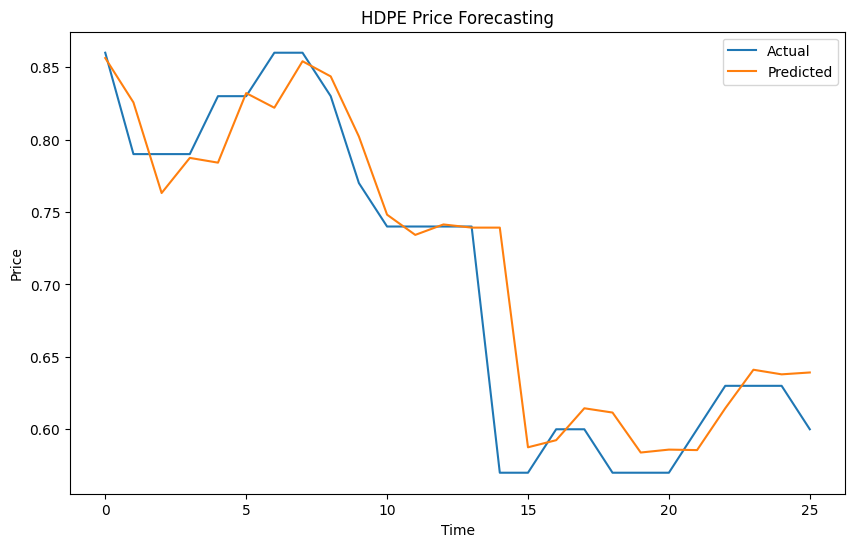

1/1 [==============================] - 0s 22ms/step


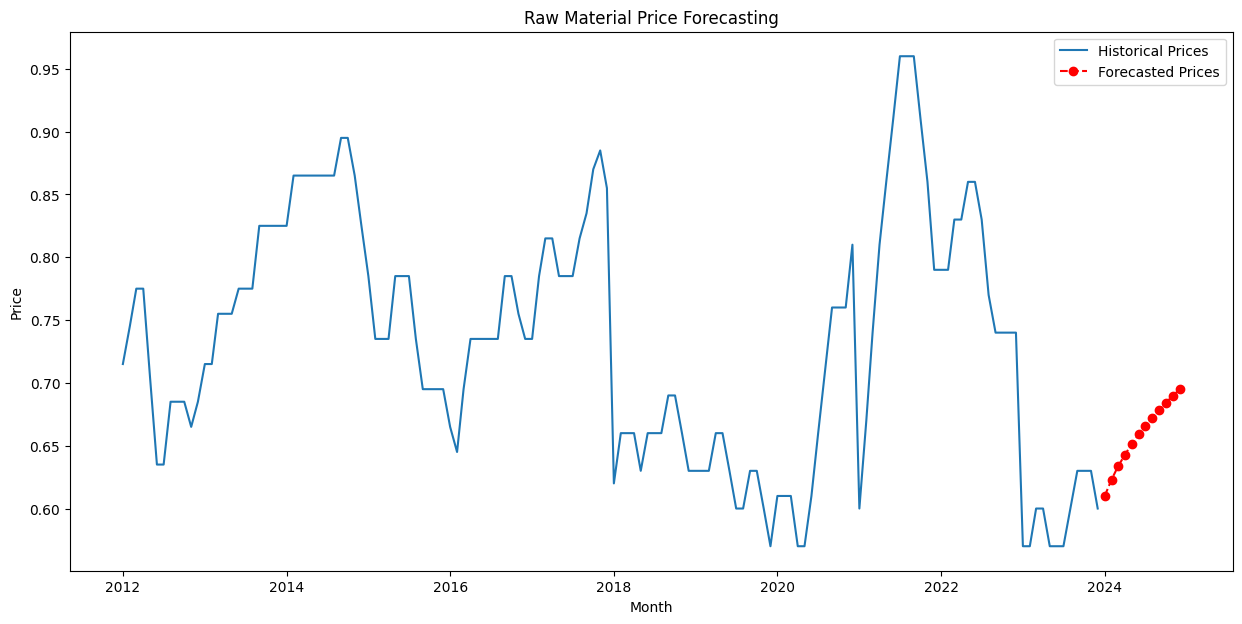

26/26 [==============================] - 0s 3ms/step
RMSE for LDPE: Train: 0.03897878143102027, Test: 0.049797404998887296


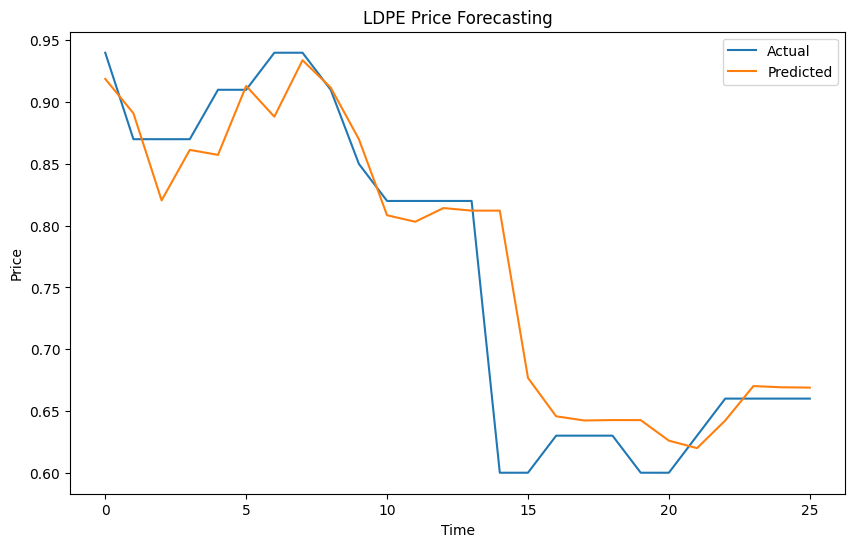

1/1 [==============================] - 0s 37ms/step


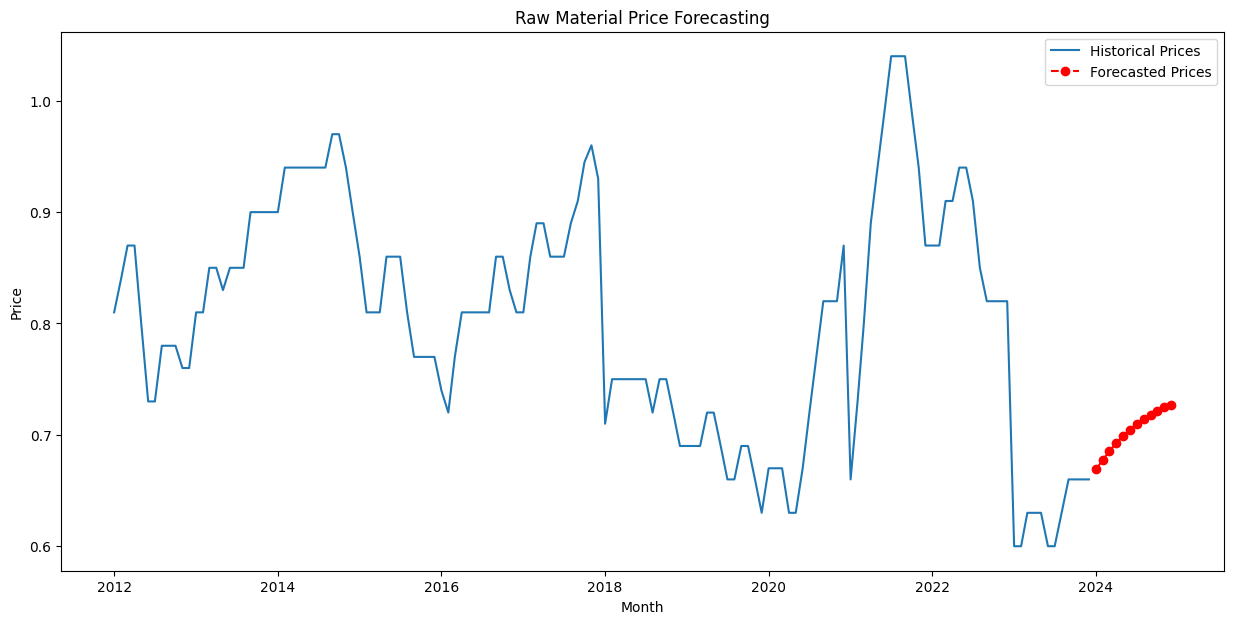

26/26 [==============================] - 0s 2ms/step
RMSE for LLDPE: Train: 0.037848329726966494, Test: 0.04649861094512774


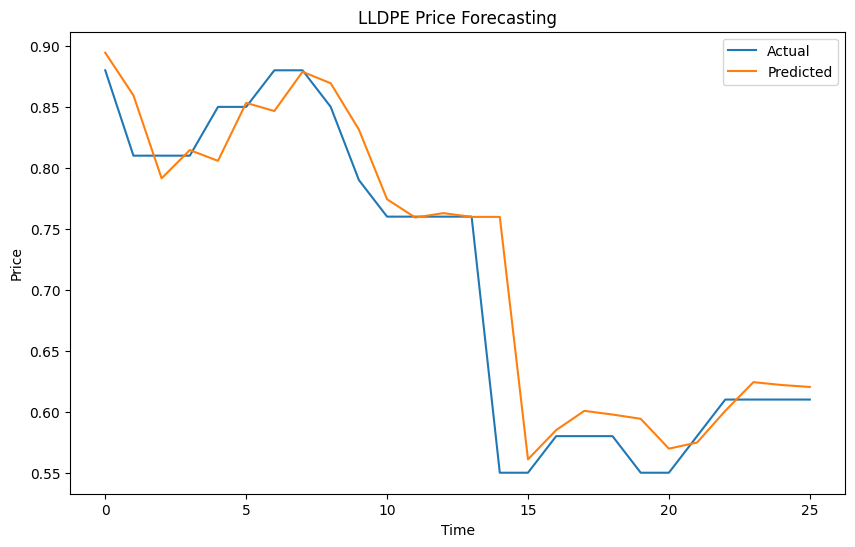

1/1 [==============================] - 0s 35ms/step


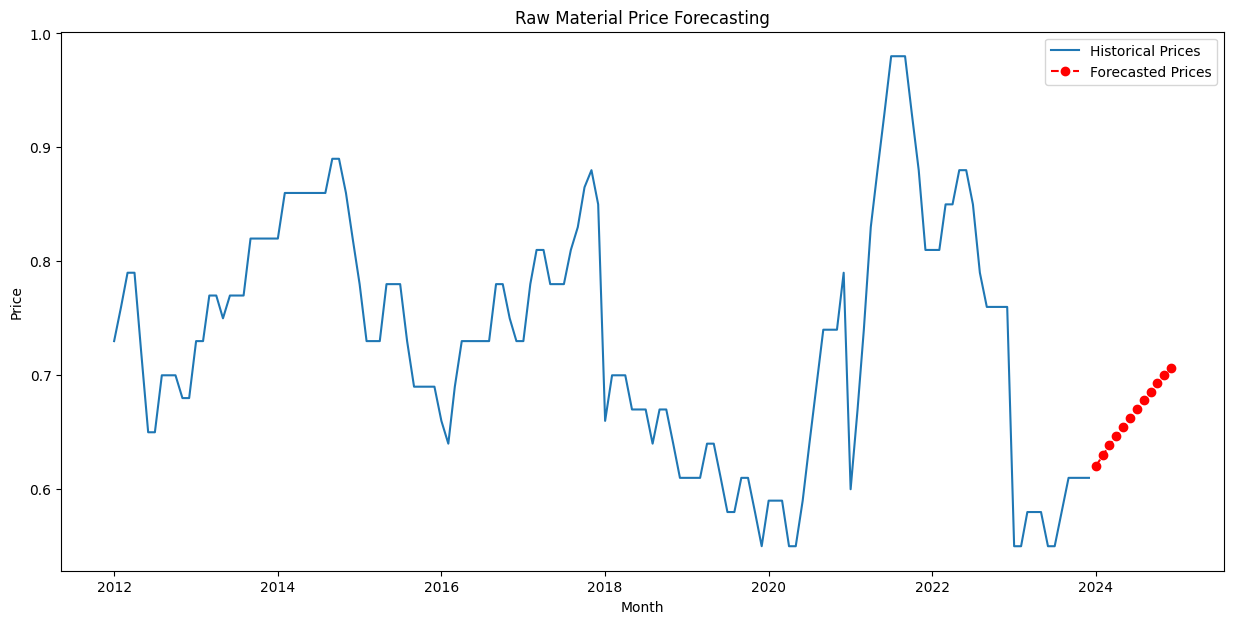

26/26 [==============================] - 0s 3ms/step
RMSE for PE: Train: 0.04401447559094254, Test: 0.05561306083117781


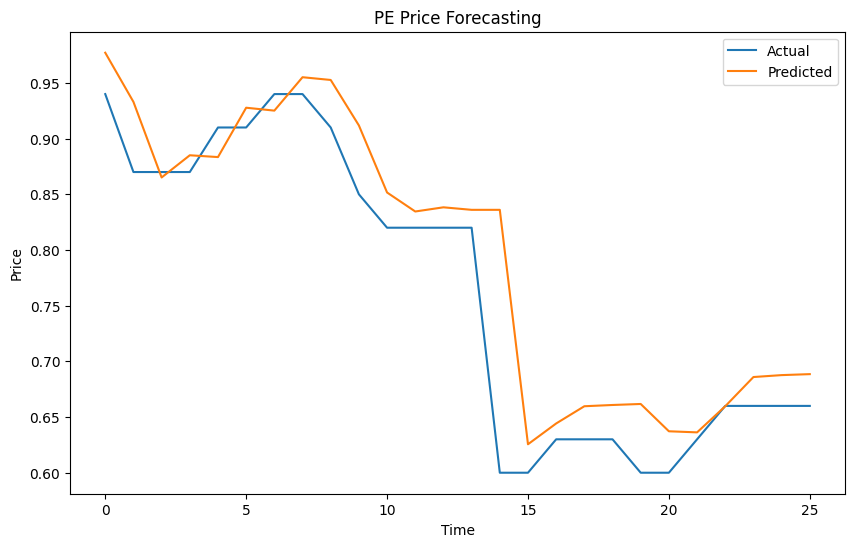

1/1 [==============================] - 0s 21ms/step


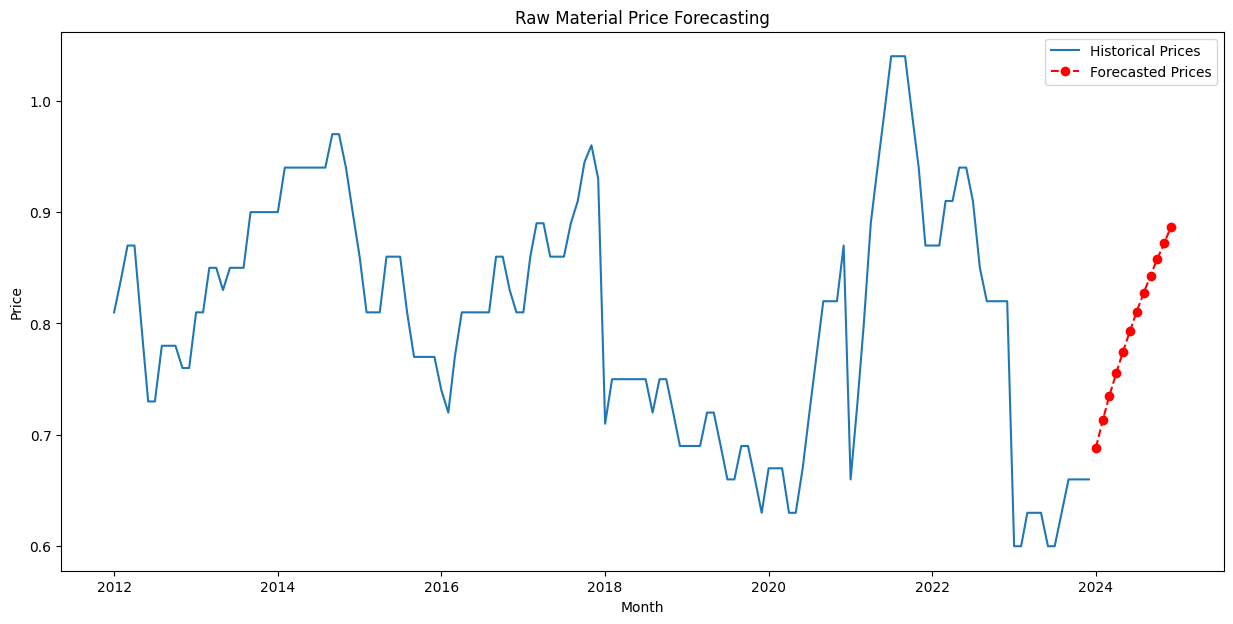

26/26 [==============================] - 0s 2ms/step
RMSE for PE - Polyethylene: Train: 0.04063865640972987, Test: 0.04878685982755458


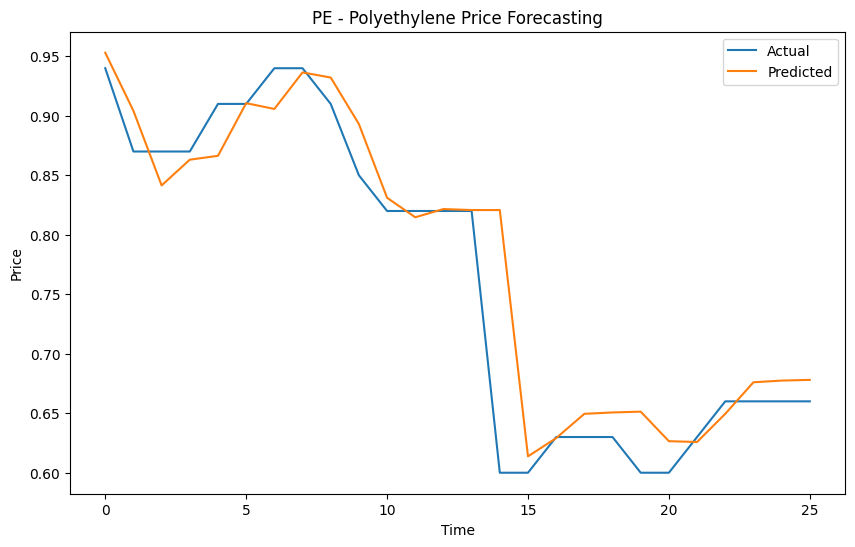

1/1 [==============================] - 0s 21ms/step


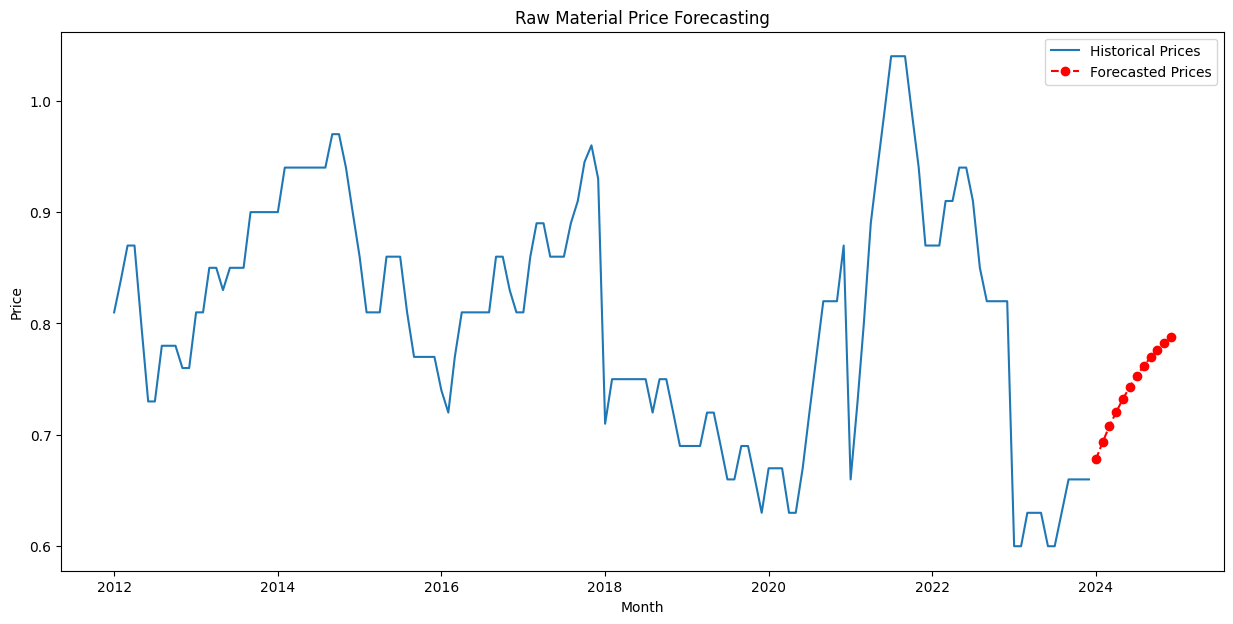

26/26 [==============================] - 0s 2ms/step
RMSE for Polystyrene: Train: 0.05596476267472381, Test: 0.06722643346649815


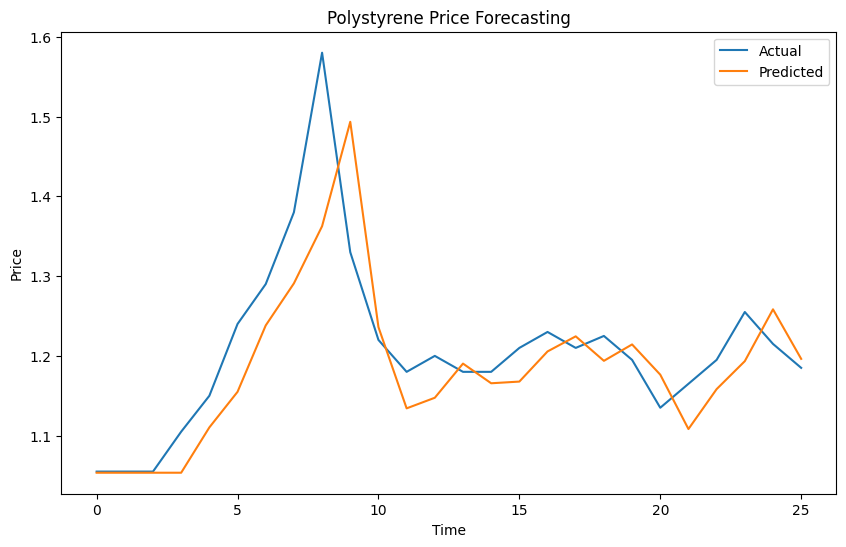

1/1 [==============================] - 0s 22ms/step


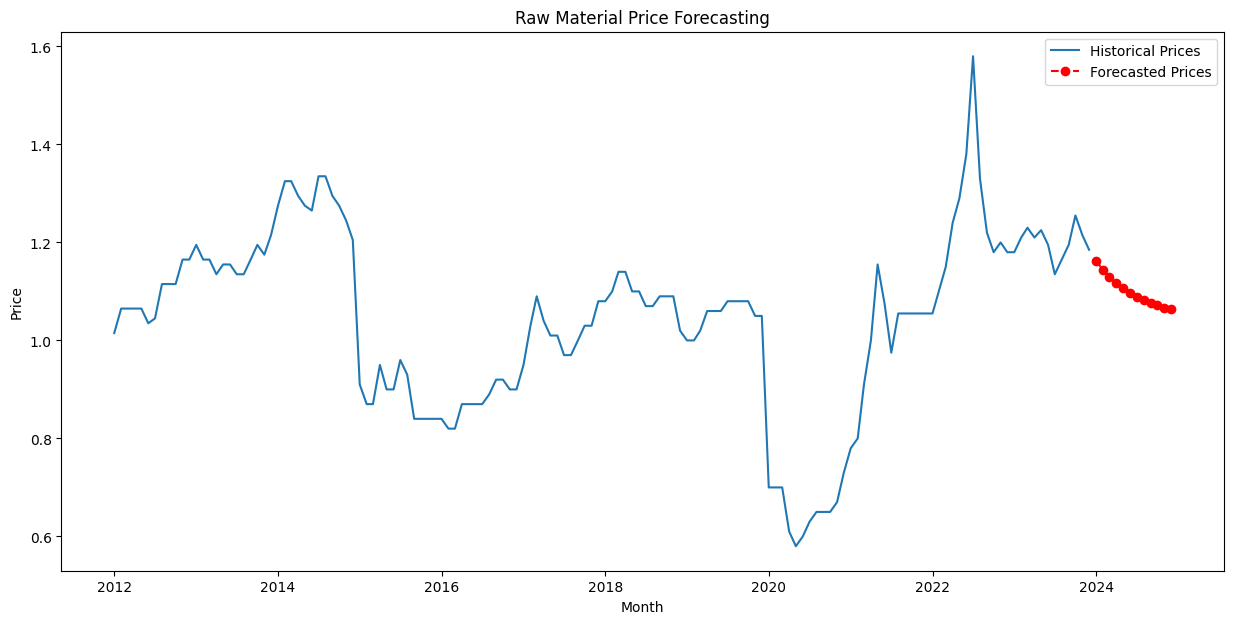

In [19]:
import pandas as pd

# Load 'Master Resin Data'
file_path = '12.2023 Master CDI Resin Trends.xlsx'
master_resin_data = pd.read_excel(file_path, sheet_name='Master Resin Data')

# Identify commodity columns (excluding 'Chg' columns and 'Date', 'Month')
commodity_columns = [col for col in master_resin_data.columns if 'Chg' not in col and col not in ['Month', 'Column1']]

# Replace missing values with the median for each commodity
for column in commodity_columns:
    median_value = master_resin_data[column].median()
    master_resin_data[column].fillna(median_value, inplace=True)

# Assuming 'spend_report_df' is your DataFrame for the "December 2023 Spend Report - Resin"
spend_file_path = 'December 2023 Spend Report - Resin - Copy.xlsx'
spend_report_df = pd.read_excel(spend_file_path, sheet_name='DATA')

# Remove rows with blanks in specified columns
columns_to_check = ['Key Raw Material', '% of Overall Inclusion %', 'Raw Material Inclusion Rate Overall', '$/UOM']
spend_report_df.dropna(subset=columns_to_check, inplace=True)

# Convert 'DATE' column to datetime format
spend_report_df['DATE'] = pd.to_datetime(spend_report_df['DATE'])

# Aggregate data to month level by taking mean
# Group by 'YEAR', 'MONTH #', and 'MATERIAL #' then aggregate by mean
spend_report_monthly = spend_report_df.groupby(['YEAR', 'MONTH #', 'MATERIAL #']).mean(numeric_only=True).reset_index()

# This will avoid the conflict and ensure that 'YEAR' and 'MONTH #' are used directly from the dataset

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load 'Master Resin Data'
# master_resin_data = pd.read_excel('/path/to/12.2023 Master CDI Resin Trends.xlsx', sheet_name='Master Resin Data')
# master_resin_data['Date'] = pd.to_datetime(master_resin_data['Date'])

# Mapping 'Key Raw Material' to 'Master Resin Data' columns
raw_material_mapping = {
    'HDPE': 'HDPE MED QUAL - BACK PAGE YES Jan 2023 $0.20 NMA',
    'LDPE': 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'LLDPE': 'LLDPE BUTENE - BACK PAGE YES Jan 2023 $0.24 NMA',
    'PE': 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'PE - Polyethylene': 'LDPE - BACK PAGE YES Jan 2023 $0.25 NMA',
    'Polystyrene': 'POLYSTYRENE GPPS'
}

look_back = 3  # Number of previous months to consider for predicting the next month
batch_size = 1  # Batch size for training
epochs = 100  # Number of epochs for training

future_raw_material_predictions = {}

for key, value in raw_material_mapping.items():
    series = master_resin_data[['Month', value]].set_index('Month').squeeze()
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_series = scaler.fit_transform(np.array(series).reshape(-1, 1))

    # Train-test split
    train_size = int(len(scaled_series) * 0.8)
    test_size = len(scaled_series) - train_size
    train, test = scaled_series[0:train_size, :], scaled_series[train_size:len(scaled_series), :]

    # Time series generator
    train_generator = TimeseriesGenerator(train, train, length=look_back, batch_size=batch_size)
    test_generator = TimeseriesGenerator(test, test, length=look_back, batch_size=batch_size)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Model training
    model.fit(train_generator, epochs=epochs, verbose=0)

    # Predictions
    train_predictions = model.predict(train_generator)
    test_predictions = model.predict(test_generator)

    # Inverse transform predictions and actual values
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    actual_train = scaler.inverse_transform(train[look_back:])
    actual_test = scaler.inverse_transform(test[look_back:])

    # Calculate RMSE
    train_rmse = sqrt(mean_squared_error(actual_train, train_predictions))
    test_rmse = sqrt(mean_squared_error(actual_test, test_predictions))
    print(f'RMSE for {key}: Train: {train_rmse}, Test: {test_rmse}')

    # Plotting actual vs. predicted for the validation set
    plt.figure(figsize=(10, 6))
    plt.plot(actual_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.title(f'{key} Price Forecasting')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

        # Number of future months to predict
    n_months = 12

    # The last 'look_back' observations to start the forecast
    last_obs = scaled_series[-look_back:]

    # Store predictions
    future_predictions_scaled = []

    # Generate predictions for the next 'n_months'
    for _ in range(n_months):
        # Reshape last 'look_back' observations to match the model's input shape
        X_last_obs = last_obs.reshape((1, look_back, 1))

        # Predict the next month's price
        next_month_prediction_scaled = model.predict(X_last_obs)

        # Append the prediction for future use
        future_predictions_scaled.append(next_month_prediction_scaled[0, 0])

        # Update the last observations to include the new prediction
        last_obs = np.append(last_obs[1:], next_month_prediction_scaled)

    # Convert the scaled predictions back to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

    # Dates for future predictions
    future_dates = pd.date_range(start=master_resin_data['Month'].max() + pd.DateOffset(months=1), periods=n_months, freq='MS')

    # Store the predictions in the dictionary
    future_raw_material_predictions[key] = future_predictions
    future_raw_material_predictions[key] = np.array(future_raw_material_predictions[key]).flatten()


    # Plotting
    plt.figure(figsize=(15, 7))
    plt.plot(master_resin_data['Month'], series, label='Historical Prices')
    plt.plot(future_dates, future_predictions, label='Forecasted Prices', linestyle='--', marker='o', color='red')
    plt.title('Raw Material Price Forecasting')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Create a DataFrame for raw material forecasts
raw_material_forecasts = pd.DataFrame(future_raw_material_predictions, index=future_dates)